In [1]:
# Get images from the fast.ai book
!git clone https://github.com/fastai/fastbook.git
!mv fastbook/images .
!ls images
!rm -rf fastbook

Cloning into 'fastbook'...
remote: Enumerating objects: 2211, done.
remote: Total 2211 (delta 0), reused 0 (delta 0), pack-reused 2211
Receiving objects: 100% (2211/2211), 75.30 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (1355/1355), done.
0_jupyter.png	     att_00044.png		   chapter4_overfit.png
analytics_chain.gif  att_00045.png		   chapter7_neuron.png
att_00000.png	     att_00046.png		   chapter9_baseconv.svg
att_00001.png	     att_00047.png		   chapter9_bottleneck.png
att_00002.png	     att_00048.png		   chapter9_cat_conv.png
att_00003.png	     att_00049.png		   chapter9_conv_basic.png
att_00004.png	     att_00050.png		   chapter9_conv_pad.png
att_00005.png	     att_00051.png		   chapter9_conv_rgb.png
att_00006.png	     att_00052.png		   chapter9_conv_stride.png
att_00007.png	     att_00053.png		   chapter9_loss_landscape.png
att_00008.png	     att_00054.png		   chapter9_nopadconv.svg
att_00009.png	     att_00055.png		   chapter9_padconv.svg
att_00010.png	     att_00056.png		 

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.7 MB/s 
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 189 kB 66.8 MB/s 
     |████████████████████████████████| 1.2 MB 50.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 386 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

### Microsoft Azure Approach
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [4]:
# import os
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [5]:
# search_images_bing

In [6]:
# results = search_images_bing(key, 'grizzly bear')
# ims = results.attrgot('contentUrl')
# len(ims)

In [7]:
# #hide
# ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [8]:
# dest = 'images/grizzly.jpg'
# download_url(ims[0], dest)

In [9]:
# im = Image.open(dest)
# im.to_thumb(128,128)

In [10]:
# bear_types = 'grizzly','black','teddy'
# path = Path('bears')

In [11]:
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
# fns = get_image_files(path)
# fns

In [13]:
# failed = verify_images(fns)
# failed

In [14]:
# failed.map(Path.unlink);

## Duck Duck Go Approach

In [15]:
urls = search_images_ddg('grizzly bear', max_images=100)
len(urls),urls[0]

(100, 'https://wildlifeimages.org/wp-content/uploads/2016/09/DSC1704.jpg')

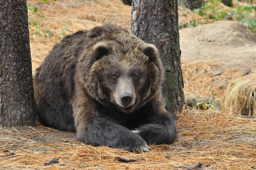

In [16]:
download_url(urls[0], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im

In [17]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [18]:
doc(search_images_bing)

In [19]:
doc(search_images_ddg)

In [20]:
doc(download_images)

In [21]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        print (f'finding pictures of {o} bears.')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear', max_images=100)
        print (len(results),results[0])
        download_images(dest, urls=results)

finding pictures of grizzly bears.
100 https://wildlifeimages.org/wp-content/uploads/2016/09/DSC1704.jpg
finding pictures of black bears.
100 https://bloximages.newyork1.vip.townnews.com/theadvocate.com/content/tncms/assets/v3/editorial/a/a4/aa434b50-7a65-5f18-b739-4e2d9f559674/5aeb8174ddc53.image.jpg
finding pictures of teddy bears.
100 https://www.kentishembroidery.co.uk/133/mm01-cuddly-mumbles-bracken-teddy-bear-989.jpg


In [22]:
fns = get_image_files(path)
fns

(#290) [Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000095.jpg'),Path('bears/grizzly/00000058.jpg'),Path('bears/grizzly/00000080.jpg'),Path('bears/grizzly/00000056.jpg'),Path('bears/grizzly/00000035.jpg'),Path('bears/grizzly/00000037.jpg'),Path('bears/grizzly/00000051.jpg'),Path('bears/grizzly/00000005.jpg'),Path('bears/grizzly/00000017.jpg')...]

In [23]:
failed = verify_images(fns)
failed

(#0) []

In [24]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

In [25]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [26]:
dls = bears.dataloaders(path)

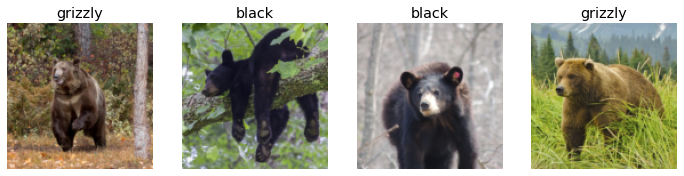

In [27]:
dls.valid.show_batch(max_n=4, nrows=1)

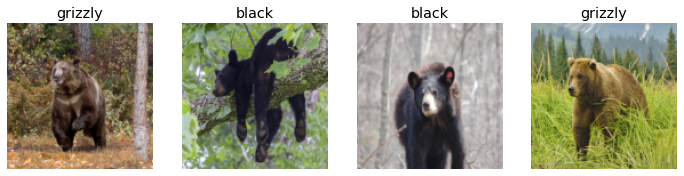

In [28]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

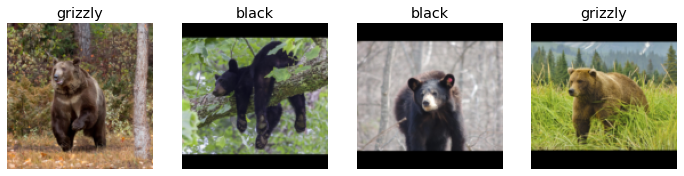

In [29]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

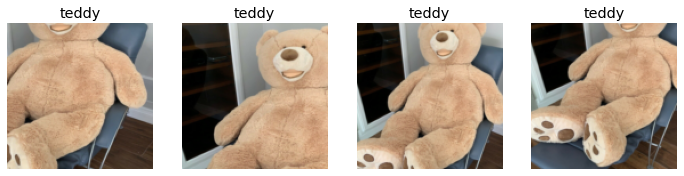

In [30]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


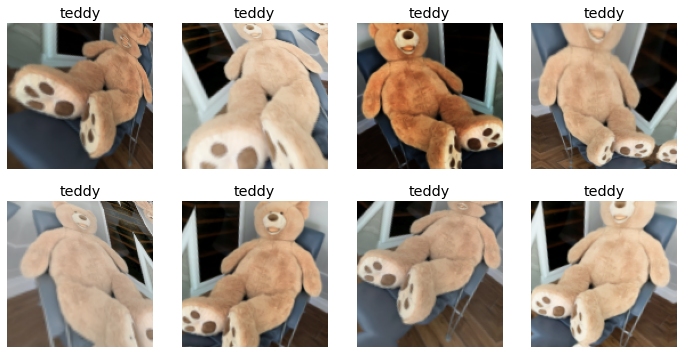

In [31]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [32]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [33]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.367486,0.939090,0.344828,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.371051,0.303908,0.086207,00:18
1,0.276661,0.110389,0.051724,00:17
2,0.211851,0.085753,0.034483,00:18
3,0.170541,0.087986,0.034483,00:18


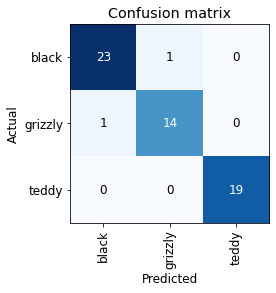

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

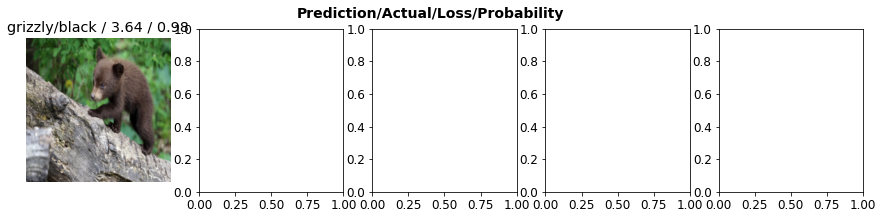

In [35]:
interp.plot_top_losses(5, nrows=1)

In [36]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [37]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [38]:
learn.export()

In [39]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [40]:
learn_inf = load_learner(path/'export.pkl')

In [41]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([1.7464e-04, 9.9981e-01, 1.2092e-05]))

In [42]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Creating a Notebook App from the Model

In [55]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [57]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [58]:
img = PILImage.create(btn_upload.data[-1])

In [59]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred,pred_idx,probs = learn_inf.predict(img)

In [64]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9998')

In [65]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [66]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [67]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [68]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [53]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. What is a p value?

  - pick a null hypothesis (e.g., no relationship)
  - gather data of independent & dependent variables
  - what % of the time would we see this relationship by chance

  **A p-value is the probability of an observation (or more extreme) result assuming that the null hypothesis is true.**

  Reasons why p-values are flawed from the American Statistical Association:
  - P-values can indicate how incompaible the data are with a specifed statistical model.
  - P- values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
  - Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
  - Proper inference requires full reporting and transparency.
  - A p-value, or statistical significance, does not measure the size of an effect of the importance of a result.
  - By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

2. What is a prior?

  Instead of having a null hypothesis we try to start with what might be more likely.  For the pandemic example prior beliefs might look like:
  - We know the flu virus "dies" at 27C
  - Other coronavirus is seasonal
  - 1918 flu was seasonal
  - Climate relationship seen in every country and city studied

3. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
4. Where do text models currently have a major deficiency?
5. What are possible negative societal implications of text generation models?
6. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
7. What kind of tabular data is deep learning particularly good at?
8. What's a key downside of directly using a deep learning model for recommendation systems?
9. What are the steps of the Drivetrain Approach?

  - Defined objective: what outcome am I trying to achieve?
  - Levers: what inputs can we control
  - Data: what data we can collect
  - Models: how the levers influence the objective

10. How do the steps of the Drivetrain Approach map to a recommendation system?
11. Create an image recognition model using data you curate, and deploy it on the web.
12. What is `DataLoaders`?

Grabs a few images at a time, puts them in a batch, loads them to GPU.  Uses batches for training.

13. What four things do we need to tell fastai to create `DataLoaders`?

- blocks: what labels are and what input data is
- get_items: filenames
- splitter: how to split into training and validation sets
- get_y: how do you label the data
- item_tfms: functions that get applied to input data before being sent to network (optional) -> data augmentation

14. What does the `splitter` parameter to `DataBlock` do?

tells how to split between test and validation sets

15. How do we ensure a random split always gives the same validation set?

set the random seed manually in the splitter

16. What letters are often used to signify the independent and dependent variables?

independent
dependent

17. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?

  - crop: grab the center part of the image
  - pad: fits whole image but pads with black bars (if using zeros) or similar image content (with reflect) to maintain aspect ratio
  - squish: fits the whole image and resamples (aspect ratio may change)

18. What is data augmentation? Why is it needed?

Data augmentation refers to making variations of the input data, such that they appear different, but are not expected to change the meaning of the data.

e.g., RandomResizedCrop takes a different part of the image each time and resamples to the target size

19. What is the difference between `item_tfms` and `batch_tfms`?

Item transforms happen to one item at a time (e.g., resize or RandomResizedCrop).  Batch transforms happen to a whole mini batch at a time (happens really fast as it happens to the whole batch at the same time)

aug_transforms return a list of augmentation transforms

20. What is a confusion matrix?

Shows for each class how many times an example was given a label of each class.  Can show correct or erroneous labels for each class pair.

21. What does `export` save?

Creates a new file `export.pickle` and contains all of the model architecture and the parameters of the model.

22. What is it called when we use a model for getting predictions, instead of training?

inference

23. What are IPython widgets?

  They are GUI widgets that can be used to create a user interface in jupyter notebooks or python applications.

24. When might you want to use CPU for deployment? When might GPU be better?


25. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?


26. What are three examples of problems that could occur when rolling out a bear warning system in practice?


27. What is "out-of-domain data"?


28. What is "domain shift"?


29. What are the three steps in the deployment process?



### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.